In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-dataset/zomato.csv
/kaggle/input/zomato-bangalore-dataset/dictionary_data.txt


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [13]:
import pandas as pd

df = pd.read_csv("/kaggle/input/zomato-bangalore-dataset/zomato.csv")


In [15]:
df.head()  # Εμφάνιση των πρώτων 5 γραμμών


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
df.sample(5)  # Δείχνει 5 τυχαίες γραμμές


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
44310,https://www.zomato.com/bangalore/akshaya-spice...,"Shop 23, M S Ramaiah Hospital Campus, New BEL ...",Akshaya Spice,No,No,NaN,0,+91 9341427999,New BEL Road,Quick Bites,NaN,"Andhra, Chinese, North Indian",300,[],[],Delivery,New BEL Road
35797,https://www.zomato.com/bangalore/zingron-koram...,"Solitaire, 62, 2nd Floor, 1st A Main, Koramang...",Zingron,Yes,No,4.0 /5,515,080 40997506\n+91 9483414002,Koramangala 7th Block,Casual Dining,"Pork Ribs, Smoked Pork, Beef Pickle, Pork Meat...","Chinese, Naga",750,"[('Rated 2.0', 'RATED\n 2 stars mainly coz u ...",[],Delivery,Koramangala 7th Block
24701,https://www.zomato.com/bangalore/vera-italiano...,"2nd Floor, 5M-402/A, HRBR 2nd Block, 5th Main ...",Vera Italiano,Yes,No,4.1/5,198,080 41523338,Kalyan Nagar,Casual Dining,"Pasta, Tiramisu, Tomato Soup, Carbonara, Chick...",Italian,600,"[('Rated 3.0', ""RATED\n In Kalyannagar where ...","['Creamy Veg Alfredo Sauce Pasta', 'Veg Diavol...",Dine-out,Kalyan Nagar
49243,https://www.zomato.com/bangalore/baithak-hsr?c...,"1659, 27th Main Road, Sector 2, HSR Layout, HS...",Baithak,No,No,4.2 /5,1385,NaN,HSR,"Casual Dining, Bar","Wood Fire Pizza, Cocktails, Ferrero Rocher Sha...","Continental, North Indian, Mughlai","1,100","[('Rated 5.0', 'RATED\n Gud service Gud staff...",[],Delivery,Sarjapur Road
10557,https://www.zomato.com/bangalore/litti-twist-b...,"No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...",Litti Twist,Yes,No,4.2/5,465,+91 8884270523,BTM,Quick Bites,"Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...","North Indian, Bihari",300,"[('Rated 4.0', ""RATED\n It's a great outlet t...","['Classic Litti', 'Special Litti', 'Aloo Litti...",Dine-out,BTM


In [17]:
df.info()  

df.describe(include='all') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.columns.tolist()


['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [21]:
df.isnull().sum().sort_values(ascending=False)


dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

In [22]:
df.drop(['url', 'phone', 'address', 'menu_item', 'dish_liked'], axis=1, inplace=True)


In [23]:
df.drop_duplicates(inplace=True)


In [24]:
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].str.replace('/5', '').astype(float)


In [25]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)


In [26]:
df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'type',
    'listed_in(city)': 'city'
}, inplace=True)


In [27]:
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51645 non-null  object 
 1   online_order  51645 non-null  object 
 2   book_table    51645 non-null  object 
 3   rate          41622 non-null  float64
 4   votes         51645 non-null  int64  
 5   location      51624 non-null  object 
 6   rest_type     51418 non-null  object 
 7   cuisines      51600 non-null  object 
 8   cost          51300 non-null  float64
 9   reviews_list  51645 non-null  object 
 10  type          51645 non-null  object 
 11  city          51645 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.1+ MB


In [29]:
df.drop_duplicates(inplace=True)


In [32]:
print(df.isnull().sum())
print(df.shape)
df.head()


name                0
online_order        0
book_table          0
rate            10023
votes               0
location           21
rest_type         227
cuisines           45
cost              345
reviews_list        0
type                0
city                0
dtype: int64
(51645, 12)


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


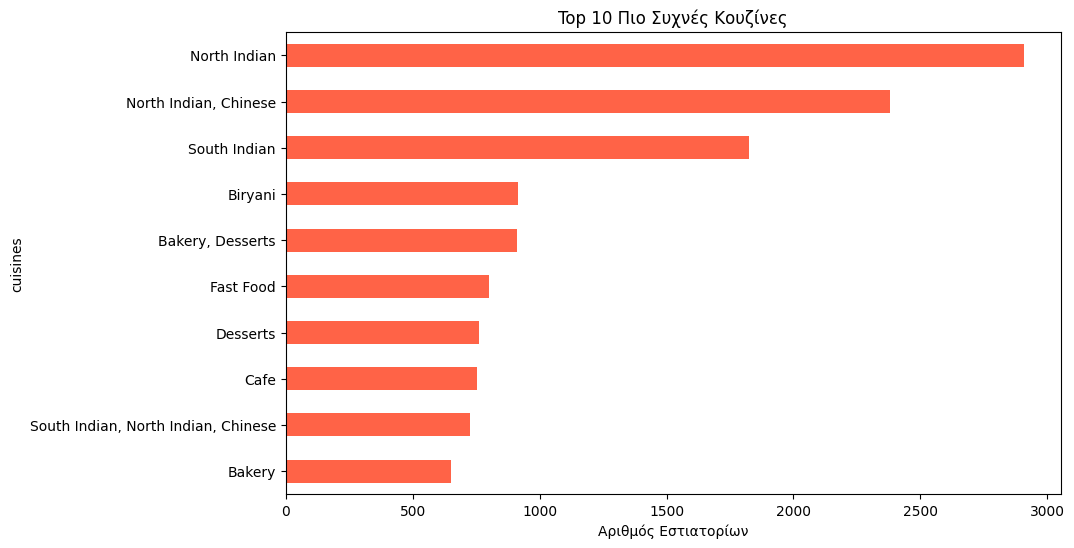

In [33]:
plt.figure(figsize=(10,6))
df['cuisines'].value_counts().head(10).plot(kind='barh', color='tomato')
plt.title('Top 10 Πιο Συχνές Κουζίνες')
plt.xlabel('Αριθμός Εστιατορίων')
plt.gca().invert_yaxis()
plt.show()


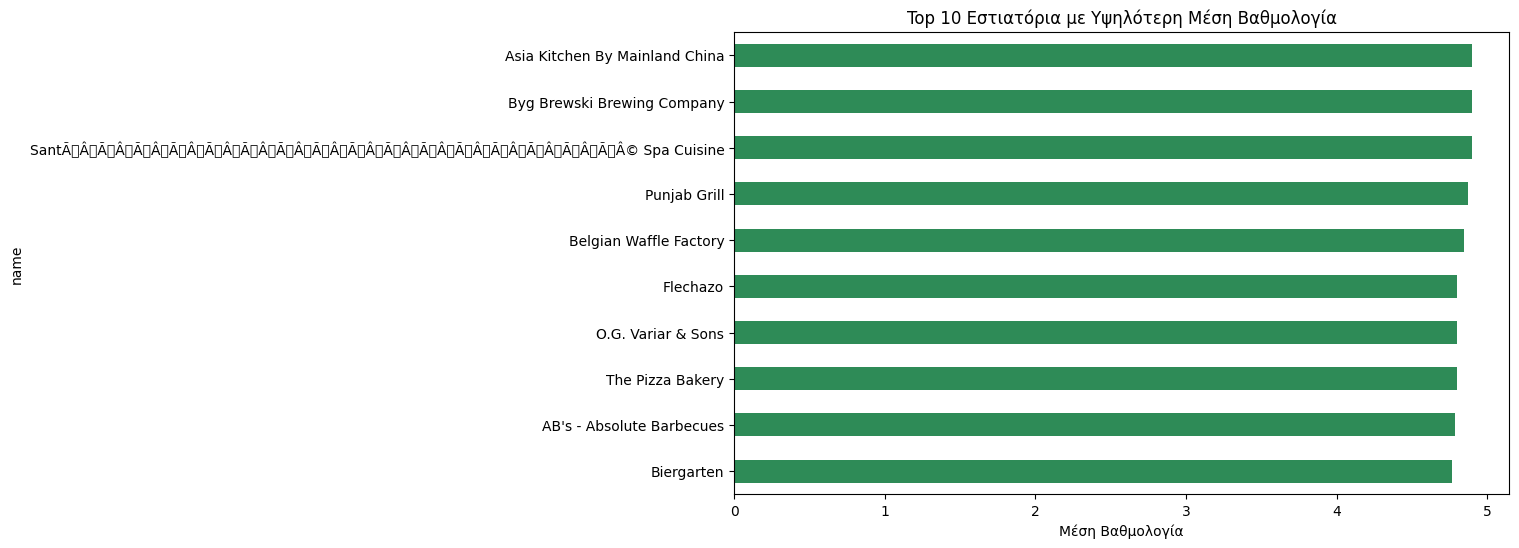

In [34]:
top_rated = df.groupby('name')['rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_rated.plot(kind='barh', color='seagreen')
plt.title('Top 10 Εστιατόρια με Υψηλότερη Μέση Βαθμολογία')
plt.xlabel('Μέση Βαθμολογία')
plt.gca().invert_yaxis()
plt.show()


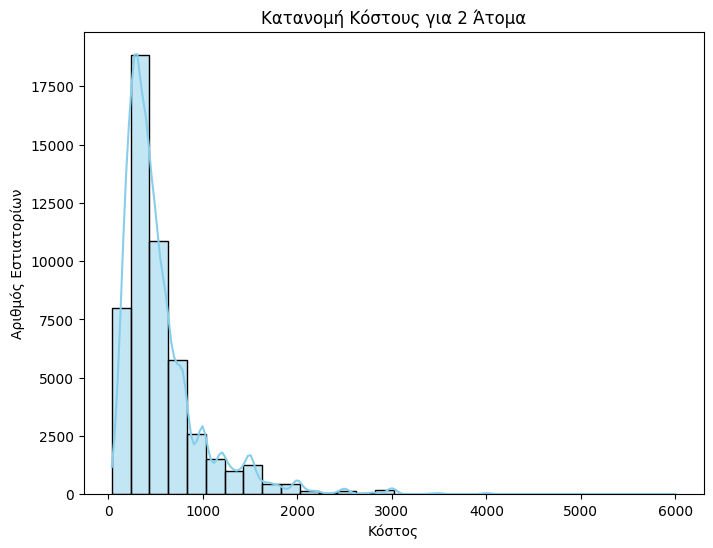

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df['cost'], bins=30, kde=True, color='skyblue')
plt.title('Κατανομή Κόστους για 2 Άτομα')
plt.xlabel('Κόστος')
plt.ylabel('Αριθμός Εστιατορίων')
plt.show()


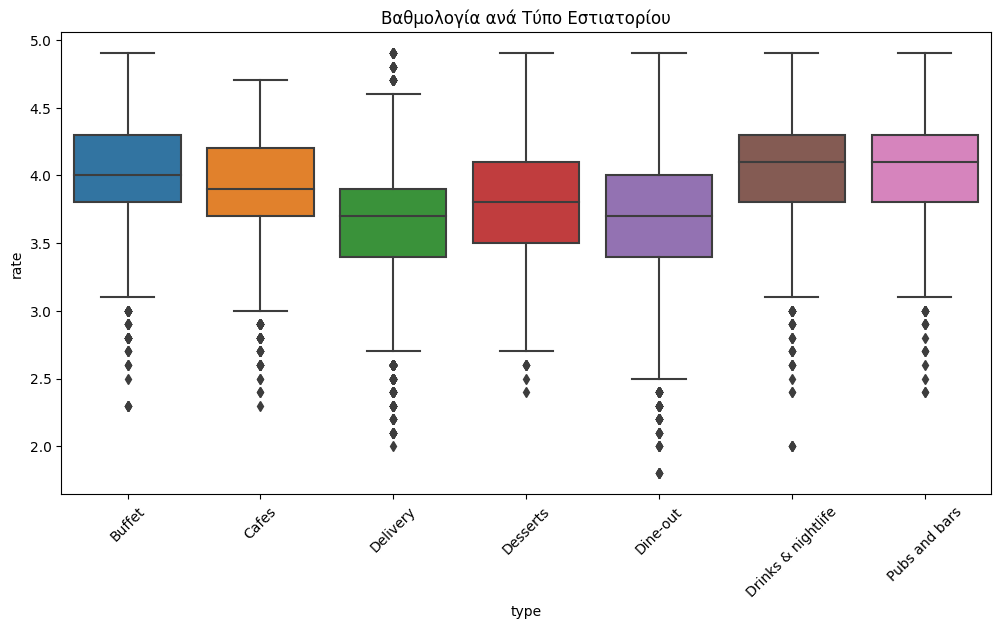

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='type', y='rate')
plt.xticks(rotation=45)
plt.title('Βαθμολογία ανά Τύπο Εστιατορίου')
plt.show()


In [37]:
def clean_data(x):
    if isinstance(x, str):
        return x.lower().replace(" ", "")
    else:
        return ''

df['combined'] = df['name'] + ' ' + df['cuisines'] + ' ' + df['location'] + ' ' + df['rest_type'] + ' ' + df['type']
df['combined'] = df['combined'].apply(clean_data)


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer(stop_words='english')
vector_matrix = cv.fit_transform(df['combined'])
similarity = cosine_similarity(vector_matrix)


In [42]:
!pip install fuzzywuzzy


In [43]:
from fuzzywuzzy import process

def recommend_restaurant(name, df=df, similarity=similarity):
    name = name.lower().replace(" ", "")
    choices = df['name'].apply(lambda x: x.lower().replace(" ", ""))
    
    # Κάνουμε fuzzy matching
    match = process.extractOne(name, choices)
    
    if match is None:
        print("Το εστιατόριο δεν βρέθηκε 😕")
        return
    
    # Βρίσκουμε το πραγματικό όνομα και το index του
    index = df[df['name'].apply(lambda x: x.lower().replace(" ", "")) == match[0]].index[0]
    
    distances = list(enumerate(similarity[index]))
    sorted_restaurants = sorted(distances, key=lambda x: x[1], reverse=True)[1:6]
    
    print("👉 Προτάσεις παρόμοιες με:", df.iloc[index]['name'])
    for i in sorted_restaurants:
        print("-", df.iloc[i[0]]['name'], "|", df.iloc[i[0]]['location'])


In [44]:
recommend_restaurant("Empire Restaurant")


👉 Προτάσεις παρόμοιες με: Empire Restaurant
- Empire Restaurant | Jayanagar
- Empire Restaurant | Bannerghatta Road
- Empire Restaurant | Jayanagar
- Empire Restaurant | Jayanagar
- Empire Restaurant | Bellandur


In [45]:
def recommend_with_filters(cuisine=None, price_range=None, df=df):
    filtered_df = df.copy()
    
    # Φιλτράρισμα βάσει κουζίνας
    if cuisine:
        filtered_df = filtered_df[filtered_df['cuisines'].str.contains(cuisine, case=False, na=False)]
    
    # Φιλτράρισμα βάσει τιμής (π.χ. για εύρος τιμής 0-500 INR)
    if price_range:
        filtered_df = filtered_df[filtered_df['average_cost_for_two'] <= price_range]
    
    # Αν δεν υπάρχουν αποτελέσματα, να ενημερώνει ο χρήστης
    if filtered_df.empty:
        print("Δεν βρέθηκαν εστιατόρια με τα φίλτρα που δώσατε.")
        return
    
    # Προτάσεις (πρώτα 5)
    recommendations = filtered_df[['name', 'location', 'cuisines', 'average_cost_for_two']].head(5)
    return recommendations


In [48]:
pip install streamlit

#δεν γινεται σε αυτη τη περιποτωση θα γινει η διαδικασία τοπικα

ERROR: Could not find a version that satisfies the requirement streamlit (from versions: none)
ERROR: No matching distribution found for streamlit
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd

# Φόρτωση δεδομένων
zomato_real = pd.read_csv("../input/zomato-bangalore-dataset/zomato.csv")

# Εξετάζουμε τις πρώτες γραμμές του dataset
zomato_real.head()

# Καθαρισμός δεδομένων: Χειρισμός τιμών που λείπουν και άλλες προετοιμασίες
zomato_real['rate'] = zomato_real['rate'].replace('NEW', None)
zomato_real['rate'] = zomato_real['rate'].replace('-', None)
zomato_real['rate'] = zomato_real['rate'].str.replace('/5', '').astype(float)

# Αφαίρεση των μη απαραίτητων γραμμών
zomato_real = zomato_real.dropna(subset=['rate', 'location', 'cuisines'])

# Δημιουργία συνάρτησης για σύσταση
def recommend_with_filters(cuisine=None, location=None):
    # Φιλτράρισμα με βάση την κουζίνα και την περιοχή
    filtered_df = zomato_real
    if cuisine:
        filtered_df = filtered_df[filtered_df['cuisines'].str.contains(cuisine, case=False, na=False)]
    if location:
        filtered_df = filtered_df[filtered_df['location'].str.contains(location, case=False, na=False)]
    
    # Επιστροφή των κορυφαίων 5 εστιατορίων
    return filtered_df[['name', 'rate', 'location', 'cuisines']].head(5)

# Δημιουργία απλού χρήστη input
cuisine_input = 'Indian'  # Μπορείς να το αλλάξεις σε όποια κουζίνα θες
location_input = 'Whitefield'  # Μπορείς να το αλλάξεις σε οποιαδήποτε περιοχή

# Κλήση της συνάρτησης και εμφάνιση των αποτελεσμάτων
recommendations = recommend_with_filters(cuisine=cuisine_input, location=location_input)

# Εκτύπωση των προτάσεων
print("Προτάσεις Εστιατορίων:")
print(recommendations)


Προτάσεις Εστιατορίων:
                           name  rate    location  \
4243              Night Diaries   3.1  Whitefield   
6745  AB's - Absolute Barbecues   4.8  Whitefield   
6746                   Flechazo   4.9  Whitefield   
6747                  Ji Hazoor   4.0  Whitefield   
6748                         HQ   4.1  Whitefield   

                                             cuisines  
4243                                     North Indian  
6745       European, Mediterranean, North Indian, BBQ  
6746          Asian, Mediterranean, North Indian, BBQ  
6747           Mughlai, North Indian, Biryani, Afghan  
6748  North Indian, Italian, Finger Food, Continental  


In [60]:
print(df.columns)


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'type', 'city',
       'combined'],
      dtype='object')


In [61]:
def recommend_with_filters(cuisine, location, min_price=None, max_price=None, min_rating=None):
    filtered_df = df.copy()

    if cuisine:
        filtered_df = filtered_df[filtered_df['cuisines'].str.contains(cuisine, case=False, na=False)]
    
    if location:
        filtered_df = filtered_df[filtered_df['location'].str.contains(location, case=False, na=False)]
    
    if min_price and max_price:
        # Αντικαθιστούμε την 'average_cost_for_two' με 'cost'
        filtered_df = filtered_df[filtered_df['cost'] >= min_price]
        filtered_df = filtered_df[filtered_df['cost'] <= max_price]
    
    if min_rating:
        filtered_df = filtered_df[filtered_df['rate'] >= min_rating]
    
    # Αν υπάρχουν αποτελέσματα, επιστρέφουμε τις προτάσεις
    if not filtered_df.empty:
        return filtered_df[['name', 'location', 'cuisines', 'cost', 'rate']]
    else:
        return None


In [63]:
def recommend_with_filters(cuisine, location, min_price=None, max_price=None, min_rating=None):
    filtered_df = df.copy()

    if cuisine:
        filtered_df = filtered_df[filtered_df['cuisines'].str.contains(cuisine, case=False, na=False)]
    
    if location:
        filtered_df = filtered_df[filtered_df['location'].str.contains(location, case=False, na=False)]
    
    if min_price and max_price:
        # Χρησιμοποιούμε τη στήλη 'cost' αντί για 'average_cost_for_two'
        filtered_df = filtered_df[filtered_df['cost'] >= min_price]
        filtered_df = filtered_df[filtered_df['cost'] <= max_price]
    
    if min_rating:
        filtered_df = filtered_df[filtered_df['rate'] >= min_rating]
    
    # Αν υπάρχουν αποτελέσματα, επιστρέφουμε τις προτάσεις
    if not filtered_df.empty:
        return filtered_df[['name', 'location', 'cuisines', 'cost', 'rate']]
    else:
        return None


In [64]:
# Εισαγωγή φίλτρων
cuisine_input = 'Indian'
location_input = 'Bangalore'
min_price_input = 300
max_price_input = 800
min_rating_input = 3.5

# Κλήση της συνάρτησης για συστάσεις με τα φίλτρα
recommendations = recommend_with_filters(cuisine=cuisine_input, location=location_input, 
                                         min_price=min_price_input, max_price=max_price_input,
                                         min_rating=min_rating_input)

# Εμφάνιση των αποτελεσμάτων
if recommendations is not None:
    print("Προτάσεις Εστιατορίων:")
    print(recommendations)
else:
    print("Δεν βρέθηκαν εστιατόρια με τα φίλτρα που δώσατε.")


Προτάσεις Εστιατορίων:
                               name           location  \
1655                   Jiyo Natural    South Bangalore   
4419                   Jiyo Natural    South Bangalore   
10060                  Jiyo Natural    South Bangalore   
13957                  Jiyo Natural    South Bangalore   
14656                     FreshMenu    North Bangalore   
16331                  Jiyo Natural    South Bangalore   
18332                  Jiyo Natural    South Bangalore   
19493                     FreshMenu    South Bangalore   
20737                  Jiyo Natural    South Bangalore   
21842                     FreshMenu    South Bangalore   
22762                  Jiyo Natural    South Bangalore   
23916                     FreshMenu    North Bangalore   
25214                     FreshMenu    North Bangalore   
27670                  Jiyo Natural    South Bangalore   
30401                  Jiyo Natural    South Bangalore   
33238                  Jiyo Natural    South Bang

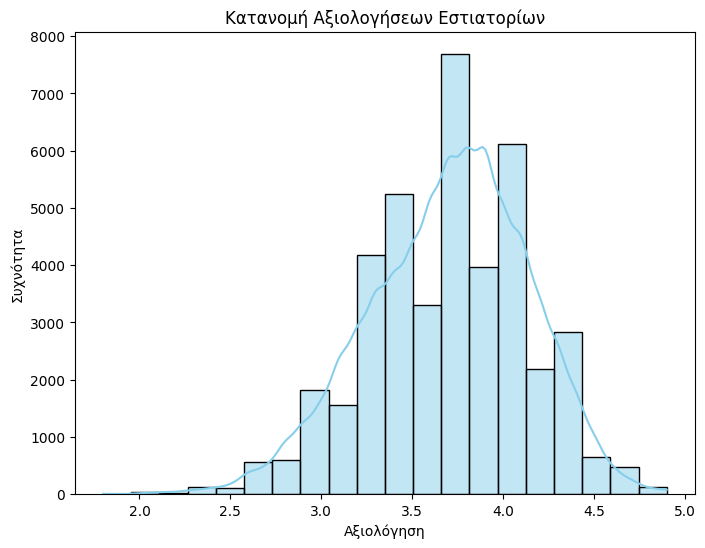

In [65]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rate'].dropna(), kde=True, color='skyblue', bins=20)
plt.title('Κατανομή Αξιολογήσεων Εστιατορίων')
plt.xlabel('Αξιολόγηση')
plt.ylabel('Συχνότητα')
plt.show()


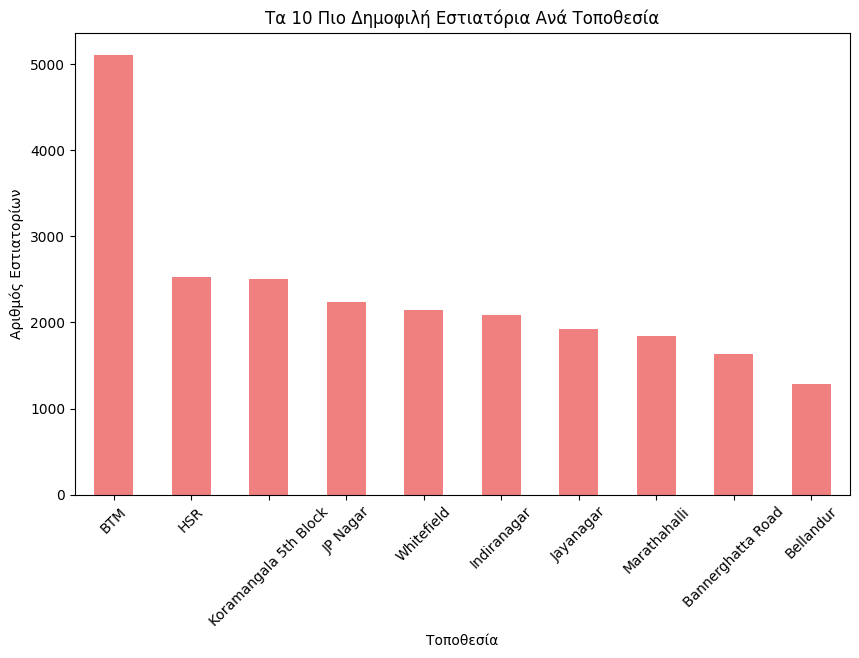

In [66]:
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='lightcoral')
plt.title('Τα 10 Πιο Δημοφιλή Εστιατόρια Ανά Τοποθεσία')
plt.xlabel('Τοποθεσία')
plt.ylabel('Αριθμός Εστιατορίων')
plt.xticks(rotation=45)
plt.show()


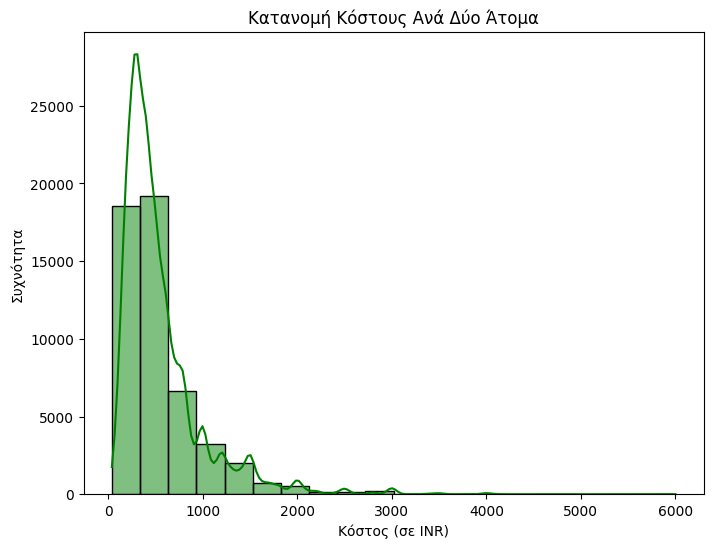

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(df['cost'].dropna(), kde=True, color='green', bins=20)
plt.title('Κατανομή Κόστους Ανά Δύο Άτομα')
plt.xlabel('Κόστος (σε INR)')
plt.ylabel('Συχνότητα')
plt.show()


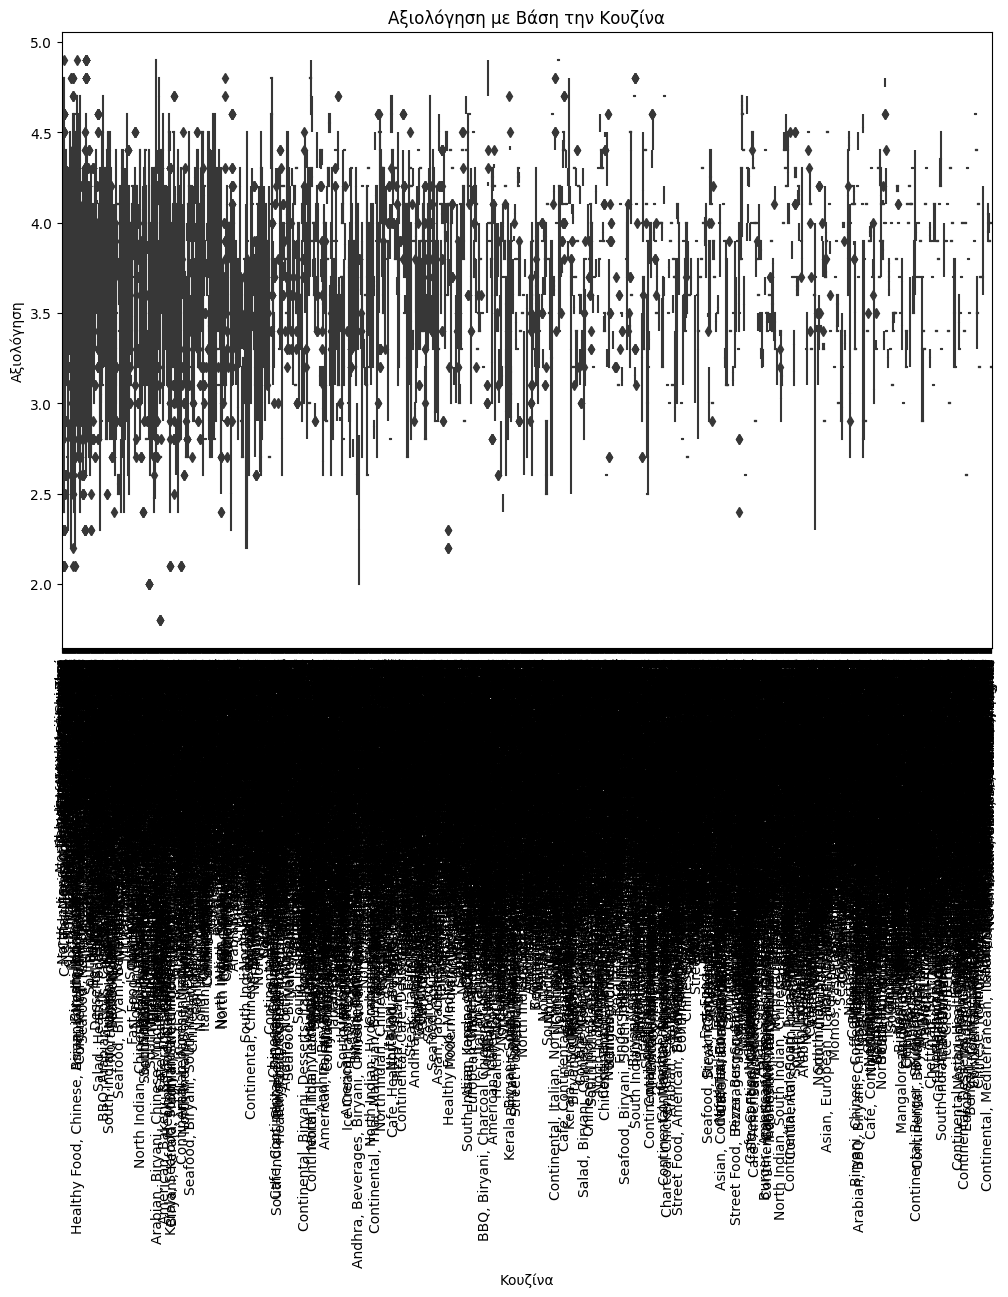

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisines', y='rate', data=df, palette='coolwarm')
plt.title('Αξιολόγηση με Βάση την Κουζίνα')
plt.xlabel('Κουζίνα')
plt.ylabel('Αξιολόγηση')
plt.xticks(rotation=90)
plt.show()


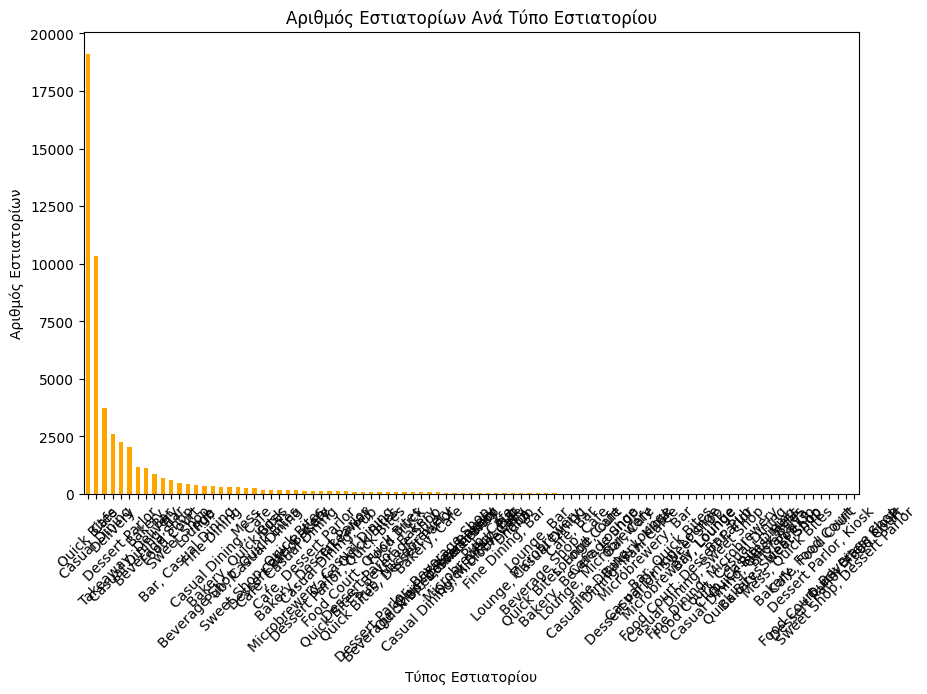

In [69]:
plt.figure(figsize=(10, 6))
df['rest_type'].value_counts().plot(kind='bar', color='orange')
plt.title('Αριθμός Εστιατορίων Ανά Τύπο Εστιατορίου')
plt.xlabel('Τύπος Εστιατορίου')
plt.ylabel('Αριθμός Εστιατορίων')
plt.xticks(rotation=45)
plt.show()


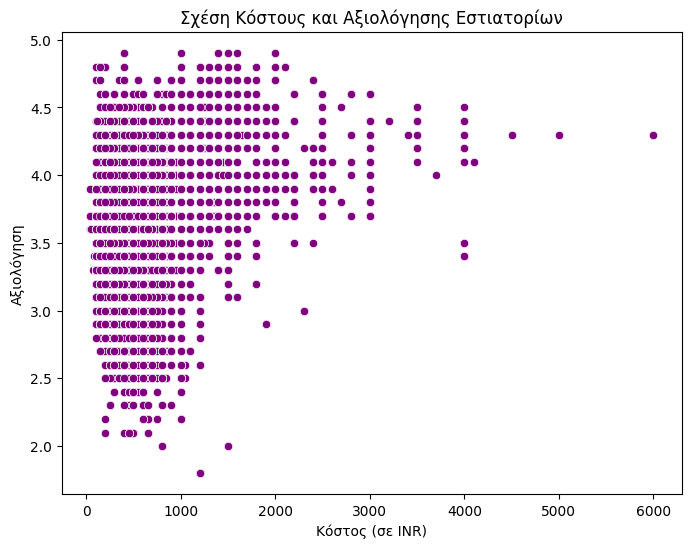

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost', y='rate', data=df, color='purple')
plt.title('Σχέση Κόστους και Αξιολόγησης Εστιατορίων')
plt.xlabel('Κόστος (σε INR)')
plt.ylabel('Αξιολόγηση')
plt.show()


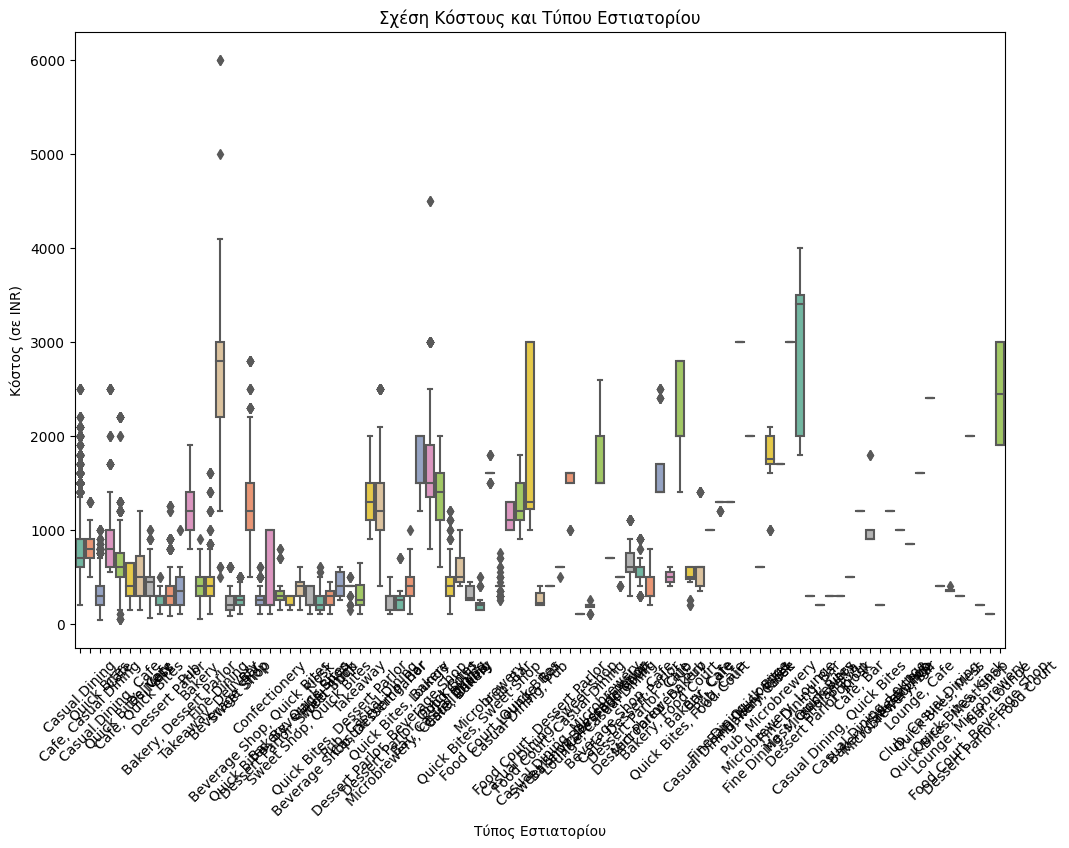

In [71]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='rest_type', y='cost', data=df, palette='Set2')
plt.title('Σχέση Κόστους και Τύπου Εστιατορίου')
plt.xlabel('Τύπος Εστιατορίου')
plt.ylabel('Κόστος (σε INR)')
plt.xticks(rotation=45)
plt.show()


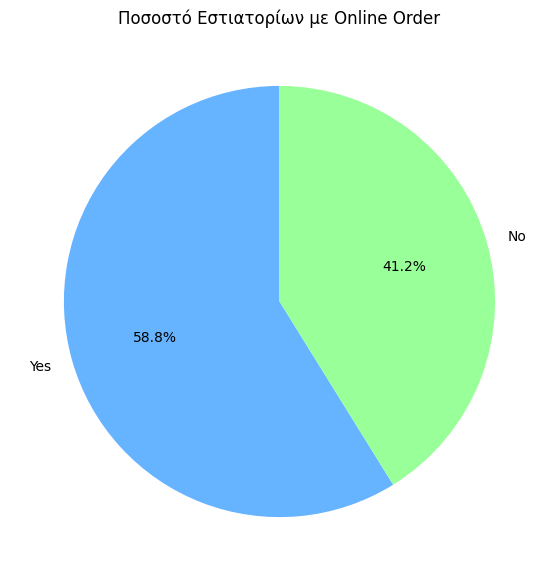

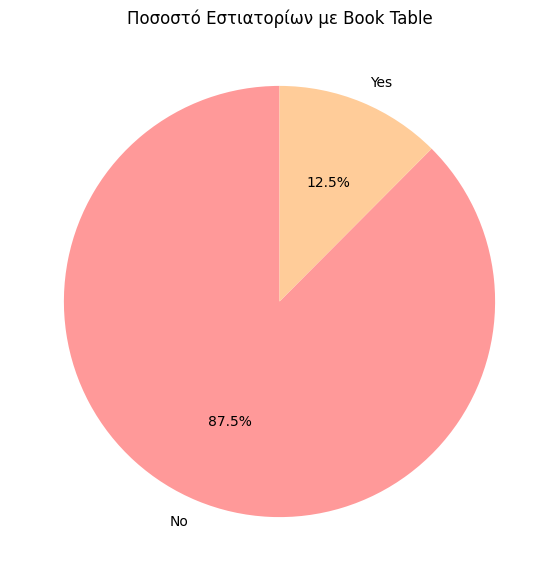

In [72]:
plt.figure(figsize=(7, 7))
online_order_counts = df['online_order'].value_counts()
online_order_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90, legend=False)
plt.title('Ποσοστό Εστιατορίων με Online Order')
plt.ylabel('')
plt.show()

# Κρατήσεις
plt.figure(figsize=(7, 7))
book_table_counts = df['book_table'].value_counts()
book_table_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#ffcc99'], startangle=90, legend=False)
plt.title('Ποσοστό Εστιατορίων με Book Table')
plt.ylabel('')
plt.show()


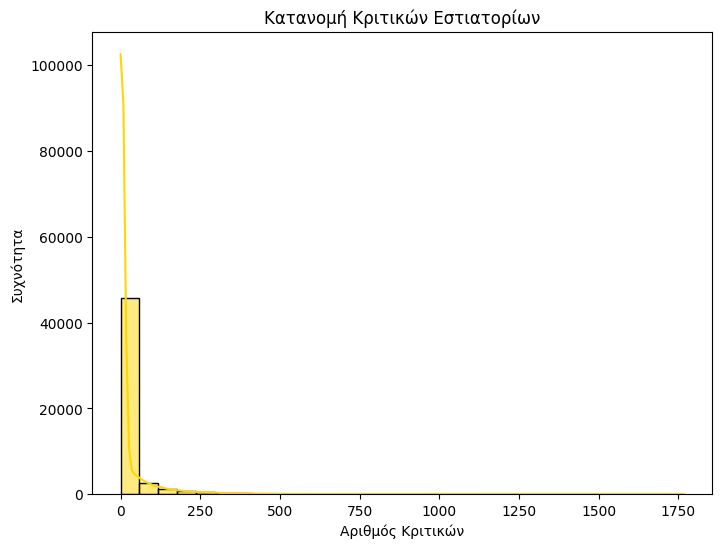

In [73]:
df['review_count'] = df['reviews_list'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
plt.figure(figsize=(8, 6))
sns.histplot(df['review_count'], kde=True, color='gold', bins=30)
plt.title('Κατανομή Κριτικών Εστιατορίων')
plt.xlabel('Αριθμός Κριτικών')
plt.ylabel('Συχνότητα')
plt.show()
